# Logistic Regression and KNN model comparison exercise

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [106]:
df = pd.read_csv('diabetes.csv')


In [107]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [108]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


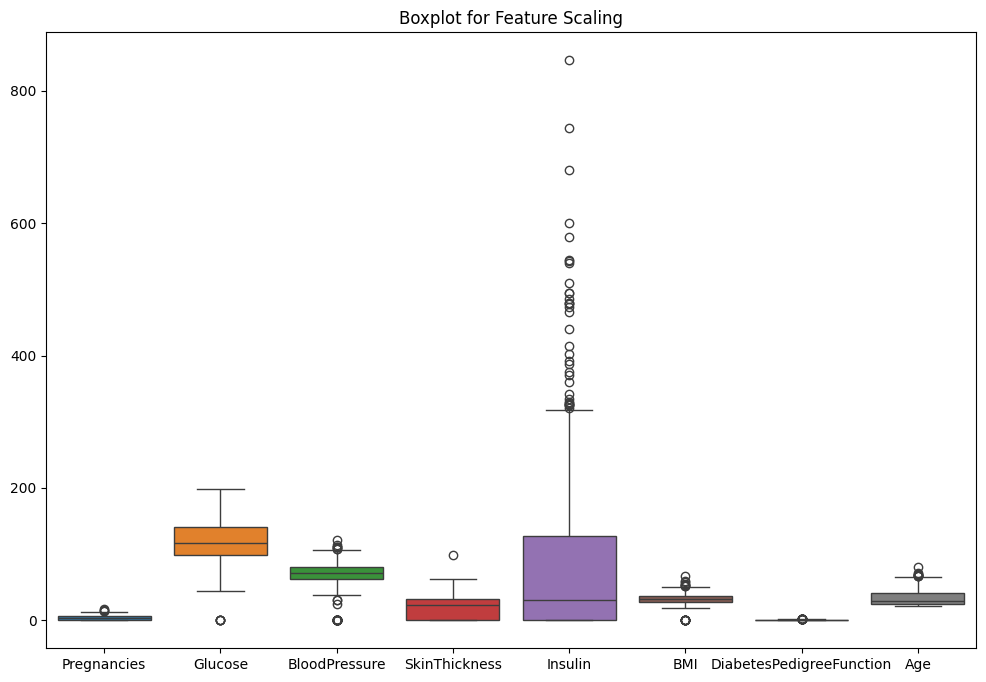

In [109]:
# Find outliers using box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Outcome']))
plt.title("Boxplot for Feature Scaling")
plt.show()

In [110]:
# Feature Scaling
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
# Split data(70/30)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg_70 = LogisticRegression()
log_reg_70.fit(X_train_70, y_train_70)
log_train_acc_70 = log_reg_70.score(X_train_70, y_train_70)
log_test_acc_70 = log_reg_70.score(X_test_70, y_test_70)

# KNN
knn_70 = KNeighborsClassifier(n_neighbors=5)
knn_70.fit(X_train_70, y_train_70)
knn_train_acc_70 = knn_70.score(X_train_70, y_train_70)
knn_test_acc_70 = knn_70.score(X_test_70, y_test_70)

# Print results for 70/30 split
print("--- Results for 70/30 split ---")
print(f"Logistic Regression: Training Accuracy = {log_train_acc_70:.2f}, Testing Accuracy = {log_test_acc_70:.2f}")
print(f"KNN: Training Accuracy = {knn_train_acc_70:.2f}, Testing Accuracy = {knn_test_acc_70:.2f}")

--- Results for 70/30 split ---
Logistic Regression: Training Accuracy = 0.78, Testing Accuracy = 0.74
KNN: Training Accuracy = 0.82, Testing Accuracy = 0.69


In [112]:
# Split data(60/40)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Logistic Regression
log_reg_60 = LogisticRegression()
log_reg_60.fit(X_train_60, y_train_60)
log_train_acc_60 = log_reg_60.score(X_train_60, y_train_60)
log_test_acc_60 = log_reg_60.score(X_test_60, y_test_60)

# KNN
knn_60 = KNeighborsClassifier(n_neighbors=5)
knn_60.fit(X_train_60, y_train_60)
knn_train_acc_60 = knn_60.score(X_train_60, y_train_60)
knn_test_acc_60 = knn_60.score(X_test_60, y_test_60)

# Print results for 60/40 split
print("--- Results for 60/40 split ---")
print(f"Logistic Regression: Training Accuracy = {log_train_acc_60:.2f}, Testing Accuracy = {log_test_acc_60:.2f}")
print(f"KNN: Training Accuracy = {knn_train_acc_60:.2f}, Testing Accuracy = {knn_test_acc_60:.2f}")


--- Results for 60/40 split ---
Logistic Regression: Training Accuracy = 0.77, Testing Accuracy = 0.76
KNN: Training Accuracy = 0.82, Testing Accuracy = 0.71


### Observations:
1. Logistic Regression
- 70/30 Split: The model shows a slight drop in performance on the test set, but it is not significant. This suggests the model generalizes well and does not overfit.
- 60/40 Split: With a larger test set, the accuracy difference between training and testing is minimal. This indicates the logistic regression model remains consistent and stable across different splits.

2. KNN
- 70/30 Split: There is a noticeable drop in accuracy between the training and testing sets, which indicates potential overfitting
- 60/40 Split: The testing accuracy improves slightly with the larger test set, but the gap between training and testing remains significant. This reinforces the likelihood of overfitting.